In [1]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Q1. Downloading the data

In [2]:
df_trn = pd.read_parquet('./data/yellow_tripdata_2023-01.parquet')
df_tst = pd.read_parquet('./data/yellow_tripdata_2023-02.parquet')

In [3]:
df_trn.shape

(3066766, 19)

In [4]:
df_tst.shape

(2913955, 19)

# Q2. Computing duration

In [5]:
df_trn['duration'] = (df_trn['tpep_dropoff_datetime'] - df_trn['tpep_pickup_datetime']).apply(lambda x: x.total_seconds() / 60)

In [6]:
df_tst['duration'] = (df_tst['tpep_dropoff_datetime'] - df_tst['tpep_pickup_datetime']).apply(lambda x: x.total_seconds() / 60)

In [7]:
df_trn['duration'].std()

42.59435124195458

# Q3. Dropping outliers

<AxesSubplot: xlabel='duration', ylabel='Count'>

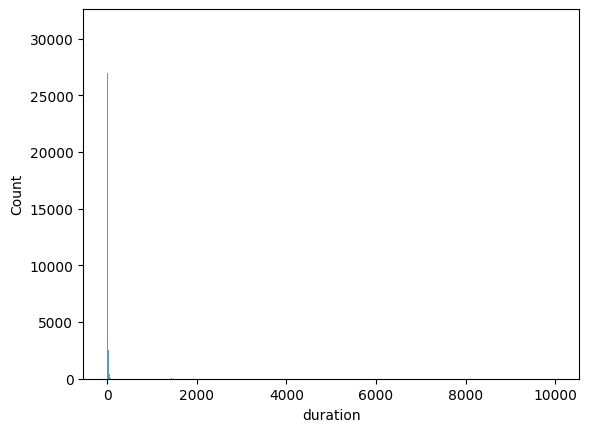

In [8]:
sns.histplot(df_trn['duration'])

In [9]:
df_trn_drop = df_trn[df_trn['duration'].between(1,60)]
df_tst_drop = df_tst[df_tst['duration'].between(1,60)]

In [10]:
len(df_trn_drop)/len(df_trn)

0.9812202822125979

# Q4. One-hot encoding

In [11]:
trn_dict = df_trn_drop[['PULocationID','DOLocationID']].astype({'PULocationID':str,'DOLocationID':str }).to_dict(orient = 'records')
tst_dict = df_tst_drop[['PULocationID','DOLocationID']].astype({'PULocationID':str,'DOLocationID':str }).to_dict(orient = 'records')

In [12]:
dv = DictVectorizer(sparse = True)
dv.fit(trn_dict)

DictVectorizer()

In [13]:
X_trn = dv.transform(trn_dict)
X_tst = dv.transform(tst_dict)

In [21]:
X_trn.shape

(3009173, 515)

In [15]:
Y_trn = df_trn_drop['duration'].values
Y_tst = df_tst_drop['duration'].values

# Q5. Training a model

In [16]:
reg = LinearRegression()
reg.fit(X_trn, Y_trn)

LinearRegression()

In [17]:
y_pred = reg.predict(X_trn)

In [23]:
mean_squared_error(Y_trn, y_pred, squared=False)

7.649261820097782

# Q6. Evaluating the model

In [19]:
y_pred_tst = reg.predict(X_tst)

In [24]:
mean_squared_error(Y_tst, y_pred_tst, squared=False)

7.811822465933683